In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from reax_bo import ReaxBO
import numpy as np

## Load data

In [82]:
rbo = ReaxBO("bonds.dat", "ClBz.data", elements=["C", "H", "Cl"])

0
1
2
3
4
5
6
7
8
9
10


In [83]:
rbo.atom_data.head()

step  iat  itype element  nb    abo      q  nlp
4518     0    1      1       C   3  3.817  0.072  0.0
3612     0    2      1       C   3  3.754  0.041  0.0
4519     0    3      1       C   3  3.870  0.015  0.0
4520     0    4      1       C   3  3.887  0.016  0.0
3613     0    5      1       C   3  3.805  0.023  0.0

In [ ]:
rbo.bond_data.head(20)

step  iat  itype ielement  nb  jat  jtype jelement  bond  bond_order
4526     0    1      1        C   3    3      1        C   C-C       1.495
4527     0    1      1        C   3    4      1        C   C-C       1.477
4528     0    1      1        C   3    7      3       Cl  C-Cl       0.837
3607     0    2      1        C   3    5      1        C   C-C       1.440
3608     0    2      1        C   3    6      1        C   C-C       1.361
3609     0    2      1        C   3   10      2        H   C-H       0.946
4529     0    3      1        C   3    6      1        C   C-C       1.390
4530     0    3      1        C   3    8      2        H   C-H       0.939
4531     0    4      1        C   3    5      1        C   C-C       1.420
4532     0    4      1        C   3   12      2        H   C-H       0.950
3610     0    5      1        C   3   11      2        H   C-H       0.935
3611     0    6      1        C   3    9      2        H   C-H       0.941
2926     0   13      1        C   3   15      1        C   C-C       1.556
2927     0   13      1        C   3   16      1        C   C-C       1.449
2928     0   13      1        C   3   19      3       Cl  C-Cl       0.835
2929     0   14      1        C   3   17      1        C   C-C       1.446
2930     0   14      1        C   3   18      1        C   C-C       1.302
2931     0   14      1        C   3   22      2        H   C-H       0.941
2932     0   15      1        C   3   18      1        C   C-C       1.496
2933     0   15      1        C   3   20      2        H   C-H       0.955

In [85]:
rbo.bond_data.bond.unique()

array(['C-C', 'C-Cl', 'C-H'], dtype=object)

In [86]:
df = rbo.bond_data[rbo.bond_data.bond == "C-Cl"].groupby("step").agg({"bond_order": ["mean", "std"]})
df.columns = df.columns.droplevel(0)
df

mean       std
step                    
0     0.843198  0.023306
1     0.843217  0.023293
2     0.843263  0.023270
3     0.843320  0.023250
4     0.843435  0.023182
5     0.843567  0.023151
6     0.843702  0.023089
7     0.843861  0.023062
8     0.844046  0.023005
9     0.844187  0.022927
10    0.844346  0.022828

(0.0, 1.0)

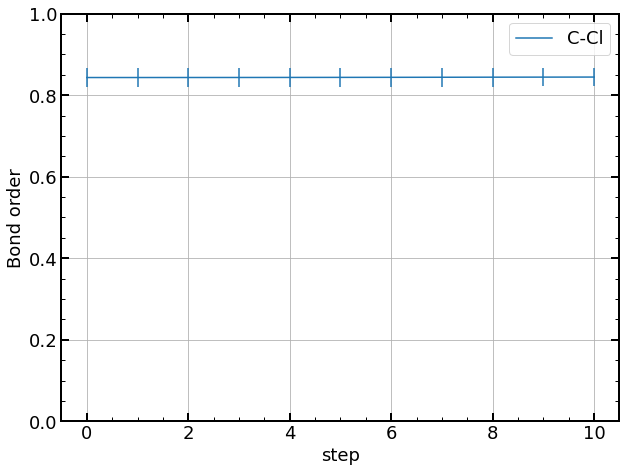

In [87]:
ax = df.plot(y="mean", yerr="std", label="C-Cl")
ax.set_ylabel("Bond order")
ax.set_ylim(0, 1)

In [88]:
dftype = rbo.bond_data.pivot_table(index="step", columns="bond", values="iat", aggfunc="count")
dftype /= 540
dftype 

bond  C-C  C-Cl  C-H
step                
0     6.0   1.0  5.0
1     6.0   1.0  5.0
2     6.0   1.0  5.0
3     6.0   1.0  5.0
4     6.0   1.0  5.0
5     6.0   1.0  5.0
6     6.0   1.0  5.0
7     6.0   1.0  5.0
8     6.0   1.0  5.0
9     6.0   1.0  5.0
10    6.0   1.0  5.0

<AxesSubplot:xlabel='step'>

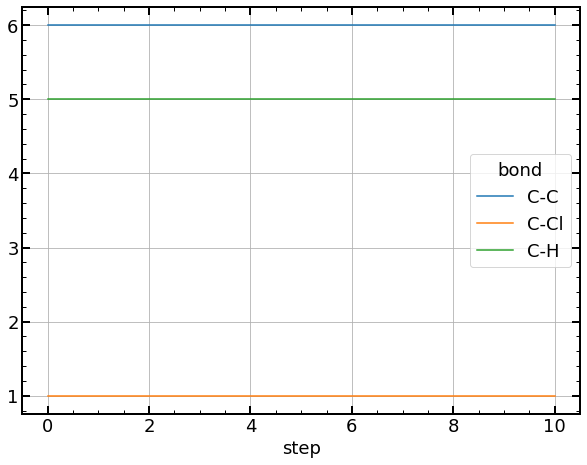

In [89]:
dftype.plot()

In [90]:
dfq = rbo.atom_data.groupby(["step", "element"]).agg({"q": ["mean", "std"]})
dfq.reset_index(inplace=True)
dfq.columns = ["step", "el", "q_mean", "q_std"]
dfq

step  el    q_mean     q_std
0      0   C -0.003383  0.042665
1      0  Cl -0.424419  0.038515
2      0   H  0.088944  0.032352
3      1   C -0.003383  0.042669
4      1  Cl -0.424409  0.038522
5      1   H  0.088949  0.032351
6      2   C -0.003383  0.042670
7      2  Cl -0.424406  0.038519
8      2   H  0.088946  0.032357
9      3   C -0.003385  0.042666
10     3  Cl -0.424407  0.038520
11     3   H  0.088946  0.032359
12     4   C -0.003390  0.042668
13     4  Cl -0.424417  0.038514
14     4   H  0.088951  0.032355
15     5   C -0.003391  0.042672
16     5  Cl -0.424420  0.038520
17     5   H  0.088950  0.032354
18     6   C -0.003387  0.042676
19     6  Cl -0.424424  0.038516
20     6   H  0.088949  0.032356
21     7   C -0.003388  0.042675
22     7  Cl -0.424422  0.038524
23     7   H  0.088952  0.032352
24     8   C -0.003392  0.042672
25     8  Cl -0.424411  0.038516
26     8   H  0.088956  0.032349
27     9   C -0.003397  0.042675
28     9  Cl -0.424411  0.038522
29     9   H  0.088969  0.032345
30    10   C -0.003397  0.042674
31    10  Cl -0.424419  0.038525
32    10   H  0.088966  0.032337

Text(0, 0.5, 'Charge Cl')

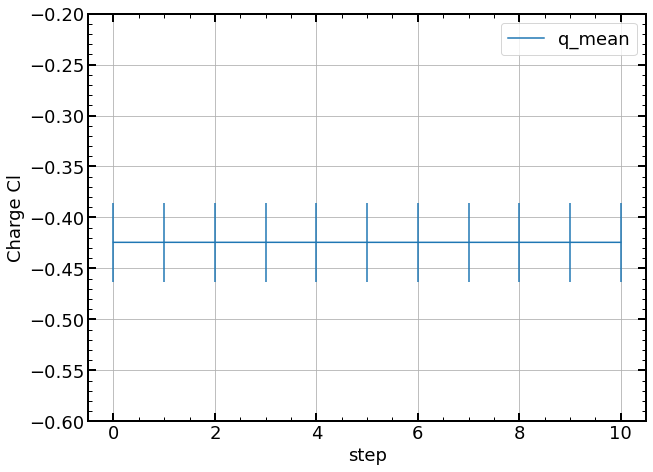

In [91]:
ax = dfq[dfq.el == "Cl"].plot(x="step", y="q_mean", yerr="q_std")
ax.set_ylim(-.6, -.2)
ax.set_ylabel("Charge Cl")

In [92]:
len(rbo.connectivity)

11

In [ ]:
molecules = [[iat + 1] for iat in range(rbo.n_atoms)]

In [94]:
molecules = [[bond] for bond in rbo.connectivity[0]]

In [ ]:
end = False
while not end:
    for mol in molecules:
        